# Forecast Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as no
from numpy import sqrt
from pandas import Grouper
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_excel("Cocacola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
data[data.duplicated()]

,Quarter,Sales


In [8]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [23]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))


In [24]:
data

,Quarter,Sales,Quarter_year,Quarter_Year
0,Q1_86,1734.827000,Q11986,Q1 1986
1,Q2_86,2244.960999,Q21986,Q2 1986
2,Q3_86,2533.804993,Q31986,Q3 1986
3,Q4_86,2154.962997,Q41986,Q4 1986
4,Q1_87,1547.818996,Q11987,Q1 1987
5,Q2_87,2104.411995,Q21987,Q2 1987
6,Q3_87,2014.362999,Q31987,Q3 1987
7,Q4_87,1991.746998,Q41987,Q4 1987
8,Q1_88,1869.049999,Q11988,Q1 1988
9,Q2_88,2313.631996,Q21988,Q2 1988


In [25]:
data['date'] = (
    pd.to_datetime(
        data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))

In [27]:
data.head()

,Quarter,Sales,Quarter_year,Quarter_Year,date
0,Q1_86,1734.827000,Q11986,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q21986,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q31986,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q41986,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q11987,Q1 1987,1987-01-01


In [28]:
data.drop(columns=['Quarter','Quarter_Year','Quarter_year'],inplace=True)

In [29]:
data.head()

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [30]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [33]:
data.set_index('date',inplace = True)

In [34]:
data.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


# Visualization

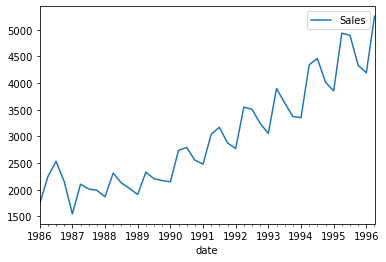

In [35]:
data.plot()
plt.show()

# 
Here we can see that the trend is upward and the seasonality is not so clear.

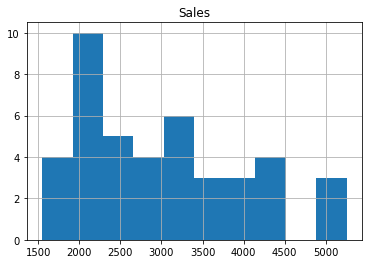

In [36]:
#Histogram
data.hist()
plt.show()

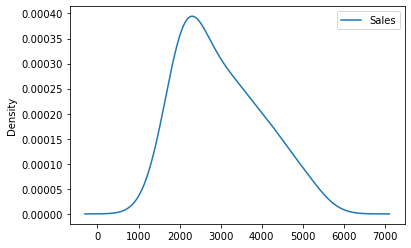

In [37]:
# Density plot
data.plot(kind='kde')
plt.show()


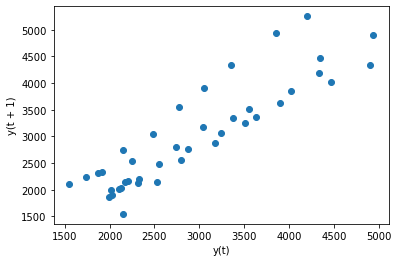

In [38]:
#Lag Plot
lag_plot(data)
plt.show()

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

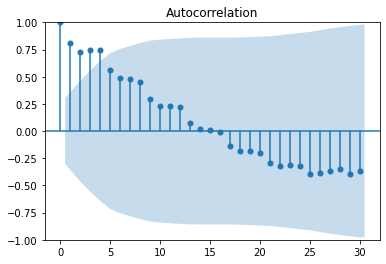

In [40]:
# Autocorrelation plot


plot_acf(data, lags=30)
plt.show()


# UpSampling


In [41]:
upsampled = data.resample('M').mean()
print(upsampled.head(30))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN


In [42]:
## interplation has done for nan values which we get after doing upsampling by month

In [43]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))


                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


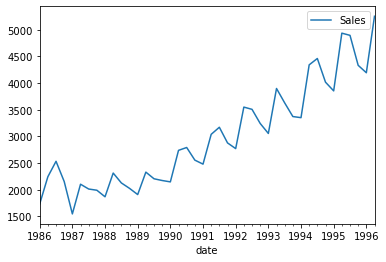

In [44]:
interpolated.plot()
plt.show()

# Transformations

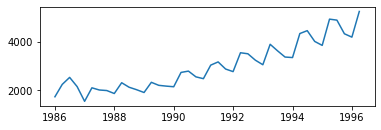

In [45]:
plt.subplot(211)
plt.plot(data)

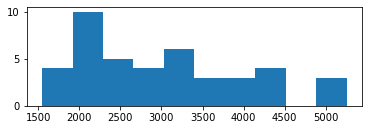

In [46]:
plt.subplot(212)
plt.hist(data)
plt.show()

# Square Root Transformation

In [47]:
df_new = pd.DataFrame(data.values)
df_new.columns = ['Sales']
df_new['Sales'] = sqrt(df_new['Sales'])

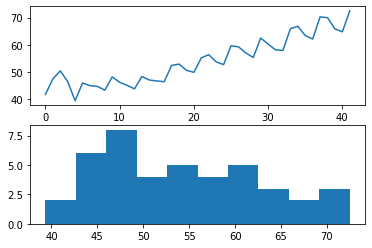

In [49]:
# line plot
plt.subplot(211)
plt.plot(df_new['Sales'])
# histogram
plt.subplot(212)
plt.hist(df_new['Sales'])
plt.show()

# Log Transform

In [50]:
from numpy import log

In [25]:
df_new = pd.DataFrame(data.values)
df_new.columns = ['Sales']
df_new['Sales'] = log(df_new['Sales'])

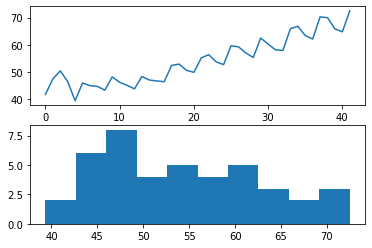

In [51]:
# line plot
plt.subplot(211)
plt.plot(df_new['Sales'])
# histogram
plt.subplot(212)
plt.hist(df_new['Sales'])
plt.show()

In [52]:
Train = interpolated.head(112)
Test  = interpolated.tail(12)

# Moving Average

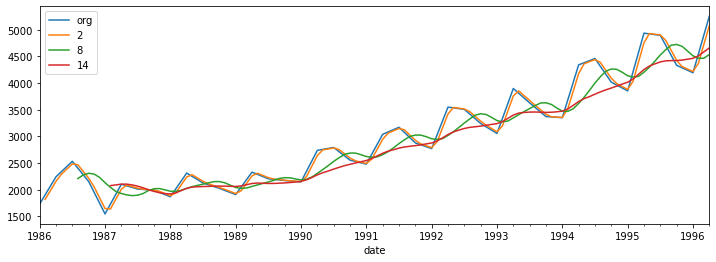

In [54]:
plt.figure(figsize=(12,4))
interpolated.Sales.plot(label="org")
for i in range(2,18,6):
    interpolated["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

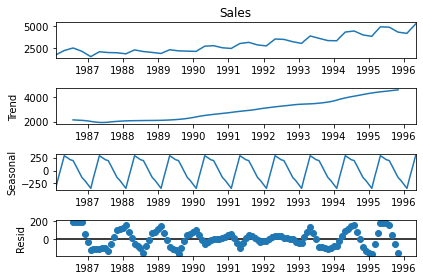

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(interpolated.Sales)  
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plot

C:\Users\Shubh191\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


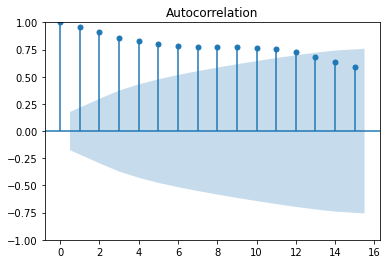

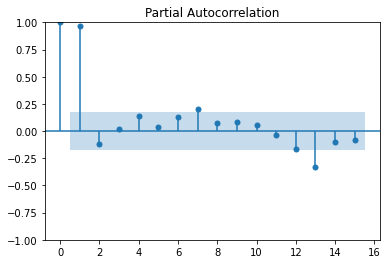

In [57]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Sales,lags=15)
tsa_plots.plot_pacf(interpolated.Sales,lags=15)
plt.show()

# Evaluation Metric MAPE


In [58]:
def MAPE(pred,org):
    temp = no.abs((pred-org)/org)*100
    return no.mean(temp)

# Simple Exponential Method


In [60]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

7.528920151221705

# Holt method

In [61]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_12736\3240688955.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


7.97154390401647

# Holts winter exponential smoothing with additive seasonality and additive trend

In [62]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_12736\4026159833.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


4.961449405073557

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [63]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_12736\1220719482.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


4.735424644081001

In [64]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Sales))
rmse_hwe_mul_add

248.5804305957031

# Final Model by combining train and test

In [65]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Sales"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [66]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

1996-05-31    5639.722750
1996-06-30    6030.563203
1996-07-31    6387.384923
1996-08-31    6735.302718
1996-09-30    7027.272874
1996-10-31    7351.854573
1996-11-30    7626.280755
1996-12-31    7998.381699
1997-01-31    8309.247799
1997-02-28    8673.007525
Freq: M, dtype: float64

In [67]:
interpolated.reset_index(inplace=True)

In [68]:
interpolated['t'] = 1

In [69]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
...,...,...,...
119,1995-12-31,4240.333333,1
120,1996-01-31,4194.000000,1
121,1996-02-29,4547.000000,1
122,1996-03-31,4900.000000,1


In [70]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_12736\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


In [71]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [72]:
interpolated['t_sq'] = (interpolated['t'])**2

In [73]:
interpolated

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [75]:
interpolated['month'] = interpolated.date.dt.strftime("%b")
interpolated["year"] = interpolated.date.dt.strftime("%Y")

In [76]:
interpolated

,date,Sales,t,t_sq,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [77]:
months = pd.get_dummies(interpolated['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [78]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [81]:
Cola = pd.concat([interpolated,months],axis=1)
Cola

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0


In [82]:
Cola['log_sales'] = no.log(Cola['Sales'])

In [83]:
Cola

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


<AxesSubplot:xlabel='month', ylabel='year'>

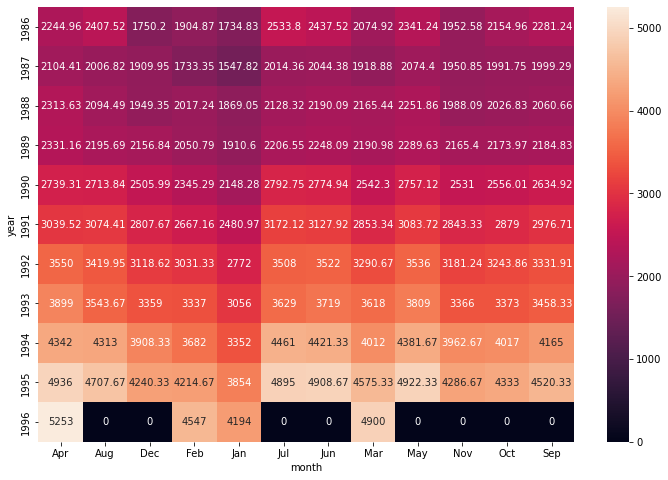

In [84]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Sales'>

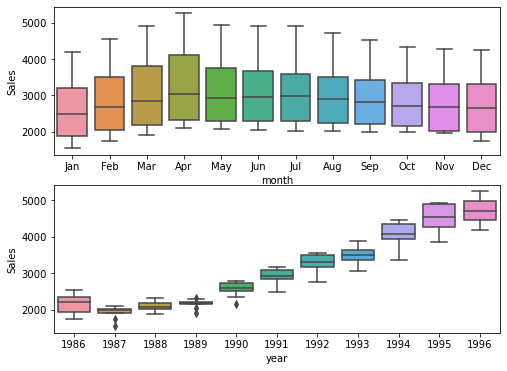

In [86]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data= Cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=Cola)

<AxesSubplot:xlabel='year', ylabel='Sales'>

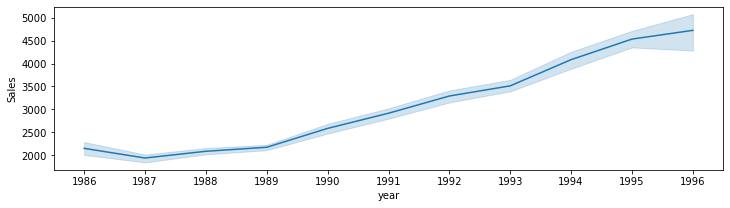

In [87]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=Cola)

# Splitting data


In [88]:
Train = Cola.head(81)
Test = Cola.tail(14)

In [89]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(pred_linear))**2))
rmse_linear

971.7382130376882

In [91]:
#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(no.exp(pred_Exp)))**2))
rmse_Exp

726.2173581917706

In [92]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(pred_Quad))**2))
rmse_Quad

1281.922596045852

In [93]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(pred_add_sea))**2))
rmse_add_sea

2232.845869768724

In [94]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1132.3372547381296

In [95]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(no.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2271.3942577636144

In [96]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = no.sqrt(no.mean((no.array(Test['Sales'])-no.array(no.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

656.5277216807301

In [97]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,656.527722
1,rmse_Exp,726.217358
0,rmse_linear,971.738213
4,rmse_add_sea_quad,1132.337255
2,rmse_Quad,1281.922596
3,rmse_add_sea,2232.845870
5,rmse_Mult_sea,2271.394258


# rmse_multi_add_sea will be prefered than any other in this analysis